<a href="https://colab.research.google.com/github/NitzV/Data-Science-/blob/main/F1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')


import plotly as py
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from folium.plugins import MarkerCluster

from google.colab import drive
drive.mount('/content/drive')

import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

import datetime
datetime.datetime.strptime

circuits = pd.read_csv('/content/drive/MyDrive/F1 Dataset/circuits.csv')
print(circuits.columns.values)

display(circuits.head(25))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['circuitId' 'circuitRef' 'name' 'location' 'country' 'lat' 'lng' 'alt'
 'url']


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.968000,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.738000,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.510600,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.261110,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.405000,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.420560,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.522800,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.163610,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.016940,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.565830,103,http://en.wikipedia.org/wiki/Hockenheimring


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
results = pd.read_csv("/content/drive/MyDrive/F1 Dataset/results.csv")
drivers = pd.read_csv("/content/drive/MyDrive/F1 Dataset/drivers.csv")
print("Columns in results dataframe:")
print(results.columns)
print("\nColumns in drivers dataframe:")
print(drivers.columns)

results_with_driver_info = pd.merge(results, drivers[['driverId','code','forename','surname']], on='driverId', how='left')

print("\nMerged DataFrame columns:")
print(results_with_driver_info.columns)
print("\nFirst 5 rows of the merged DataFrame:")
print(results_with_driver_info[[ 'code', 'forename', 'surname', 'position']].head())
results_with_driver_info.info()

output_path = "/content/drive/MyDrive/F1 Dataset/results_with_driver_info.csv"

results_with_driver_info.to_csv(output_path, index=False)

print(f"DataFrame saved successfully to: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in results dataframe:
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

Columns in drivers dataframe:
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

Merged DataFrame columns:
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'code', 'forename', 'surname'],
      dtype='object')

First 5 rows of the merged DataFrame:
  code  forename     surn

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
results = pd.read_csv("/content/drive/MyDrive/F1 Dataset/results.csv")
drivers = pd.read_csv("/content/drive/MyDrive/F1 Dataset/drivers.csv")
print("Columns in results dataframe:")
print(results.columns)
print("\nColumns in drivers dataframe:")
print(drivers.columns)

results_with_driver_info = pd.merge(results, drivers[['driverId','code','forename','surname']], on='driverId', how='left')

print("\nMerged DataFrame columns:")
print(results_with_driver_info.columns)
print("\nFirst 5 rows of the merged DataFrame:")
print(results_with_driver_info[[ 'code', 'forename', 'surname', 'position']].head())
results_with_driver_info.info()

# Replace '\N' and 'R' with NaN so dropna can recognize them
results_with_driver_info.replace(['\\N', 'R'], pd.NA, inplace=True)


# Drop rows with any missing values (including the ones we just replaced)
results_with_driver_info.dropna(inplace=True)


output_path = "/content/drive/MyDrive/F1 Dataset/results_with_driver_info.csv"

results_with_driver_info.to_csv(output_path, index=False)

print(f"DataFrame saved successfully to: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in results dataframe:
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

Columns in drivers dataframe:
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

Merged DataFrame columns:
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'code', 'forename', 'surname'],
      dtype='object')

First 5 rows of the merged DataFrame:
  code  forename     surn

In [ ]:
drivers=pd.read_csv('/content/drive/MyDrive/F1 Dataset/drivers.csv')
display(drivers.head(15))
results= pd.read_csv('/content/drive/MyDrive/F1 Dataset/results.csv')
display(results.head(15))
races= pd.read_csv('/content/drive/MyDrive/F1 Dataset/races.csv')
display(races.head())

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,54,8,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,29-03-2009,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,05-04-2009,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,19-04-2009,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,26-04-2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,10-05-2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
df1= pd.merge(results, drivers, on='driverId')
df2= pd.merge(df1, races, on='raceId')
df= pd.merge(df2, circuits, on='circuitId')
results1= df2
results2=df2[df2.year>2009]

print(results2.columns.values)
results2.head()

['resultId' 'raceId' 'driverId' 'constructorId' 'number_x' 'grid'
 'position' 'positionText' 'positionOrder' 'points' 'laps' 'time_x'
 'milliseconds' 'fastestLap' 'rank' 'fastestLapTime' 'fastestLapSpeed'
 'statusId' 'driverRef' 'number_y' 'code' 'forename' 'surname' 'dob'
 'nationality' 'url_x' 'year' 'round' 'circuitId' 'name' 'date' 'time_y'
 'url_y' 'fp1_date' 'fp1_time' 'fp2_date' 'fp2_time' 'fp3_date' 'fp3_time'
 'quali_date' 'quali_time' 'sprint_date' 'sprint_time']


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
20320,20323,337,4,6,8,3,1,1,1,25.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
20321,20324,337,13,6,7,2,2,2,2,18.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
20322,20325,337,1,1,2,4,3,3,3,15.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
20323,20326,337,20,9,5,1,4,4,4,12.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
20324,20327,337,3,131,4,5,5,5,5,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
def time_to_seconds(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        mins, secs = time_str.split(':')
        return float(mins) * 60 + float(secs)
    else:
        return None

combined['Fastest_Lap_Seconds'] = combined['fastestLapTime'].apply(time_to_seconds)
combined['fastestLapSpeed'] = pd.to_numeric(combined['fastestLapSpeed'], errors='coerce').fillna(0)

driver_circuit = (
    combined.groupby(['Name', 'circuitRef', 'country'])
    .agg({
        'Fastest_Lap_Seconds': 'mean',
        'fastestLapSpeed': 'mean',
        'points': 'mean'
    })
    .reset_index()
)

driver_circuit.rename(columns={
    'Fastest_Lap_Seconds': 'Avg_Lap_Time(s)',
    'fastestLapSpeed': 'Avg_Lap_Speed(kph)',
    'points': 'Avg_Points'
}, inplace=True)

display(driver_circuit.head(10))

,Name,circuitRef,country,Avg_Lap_Time(s),Avg_Lap_Speed(kph),Avg_Points
0,Adolf Brudes,nurburgring,Germany,NaN,0.000000,0.000000
1,Adolfo Cruz,galvez,Argentina,NaN,0.000000,0.000000
2,Adrian Sutil,albert_park,Australia,92.639429,206.546000,1.142857
3,Adrian Sutil,americas,USA,NaN,0.000000,0.000000
4,Adrian Sutil,bahrain,Bahrain,101.114500,198.333167,0.000000
5,Adrian Sutil,buddh,India,88.854000,207.648500,2.000000
6,Adrian Sutil,catalunya,Spain,87.572800,136.778286,0.857143
7,Adrian Sutil,fuji,Japan,86.540000,190.545000,0.500000
8,Adrian Sutil,hockenheimring,Germany,79.035000,208.550667,0.000000
9,Adrian Sutil,hungaroring,Hungary,86.153500,157.047143,0.000000


Filtered dataset has: 264 rows after applying both filters.


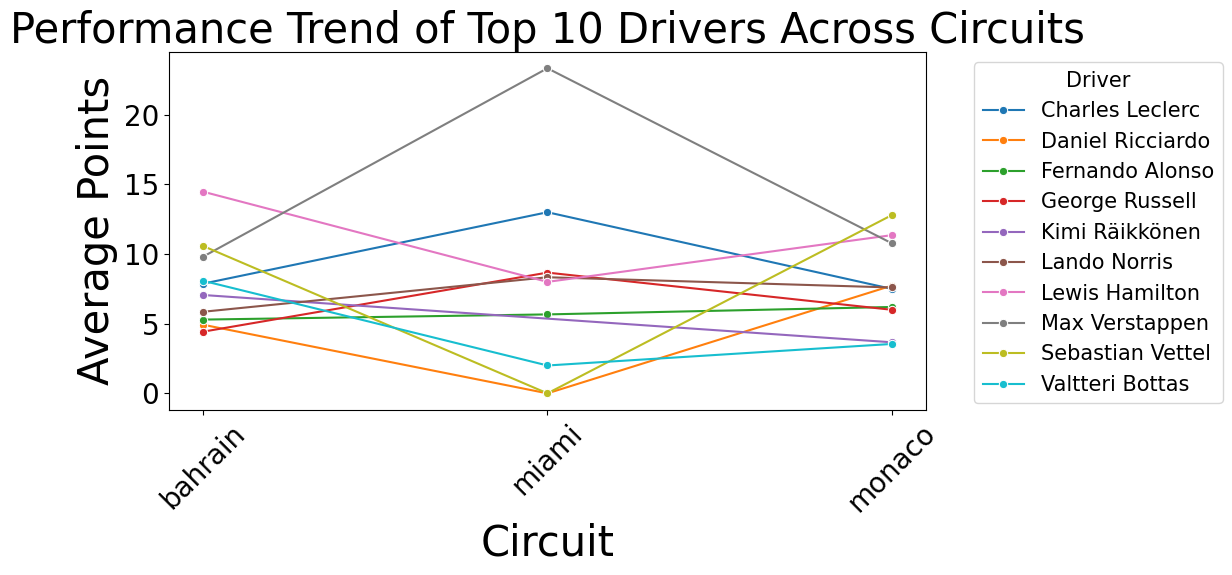

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 Drivers
top_drivers = [
    'Lewis Hamilton', 'Max Verstappen', 'Valtteri Bottas',
    'Sebastian Vettel', 'Fernando Alonso', 'Charles Leclerc',
    'Lando Norris', 'Daniel Ricciardo', 'Kimi Räikkönen',
    'George Russell'
]

# Selected Circuits
selected_circuits = [
    'australia', 'japan', 'bahrain', 'saudi_arabia', 'miami',
    'china', 'spain', 'monaco', 'austria', 'canada',
    'great_britain', 'hungary', 'netherlands', 'belgium',
    'italy', 'azerbaijan', 'singapore', 'usa', 'mexico',
    'abudhabi', 'qatar'
]

df['Driver_Name'] = df['forename'] + ' ' + df['surname']

df['circuitRef'] = df['circuitRef'].str.lower()

# Apply both filters
filtered_df = df[
    (df['Driver_Name'].isin(top_drivers)) &
    (df['circuitRef'].isin(selected_circuits))
]

print("Filtered dataset has:", len(filtered_df), "rows after applying both filters.")
avg_points_circuit = filtered_df.groupby(['Driver_Name', 'circuitRef'])['points'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_points_circuit, x='circuitRef', y='points', hue='Driver_Name', marker='o')
plt.title('Performance Trend of Top 10 Drivers Across Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Merged Columns!
Rows: 26759 | Columns: 46
F1 Master Dataset


,Name,nationality,year,points,position,fastestLap,fastestLapTime,fastestLapSpeed,circuitRef,country,location
0,Lewis Hamilton,British,2008,10.0,1.0,39,1:27.452,218.300,albert_park,Australia,Melbourne
1,Nick Heidfeld,German,2008,8.0,2.0,41,1:27.739,217.586,albert_park,Australia,Melbourne
2,Nico Rosberg,German,2008,6.0,3.0,41,1:28.090,216.719,albert_park,Australia,Melbourne
3,Fernando Alonso,Spanish,2008,5.0,4.0,58,1:28.603,215.464,albert_park,Australia,Melbourne
4,Heikki Kovalainen,Finnish,2008,4.0,5.0,43,1:27.418,218.385,albert_park,Australia,Melbourne
5,Kazuki Nakajima,Japanese,2008,3.0,6.0,50,1:29.639,212.974,albert_park,Australia,Melbourne
6,Sébastien Bourdais,French,2008,2.0,7.0,54,1:29.534,213.224,albert_park,Australia,Melbourne
7,Kimi Räikkönen,Finnish,2008,1.0,8.0,20,1:27.903,217.180,albert_park,Australia,Melbourne
8,Robert Kubica,Polish,2008,0.0,NaN,15,1:28.753,215.100,albert_park,Australia,Melbourne
9,Timo Glock,German,2008,0.0,NaN,23,1:29.558,213.166,albert_park,Australia,Melbourne


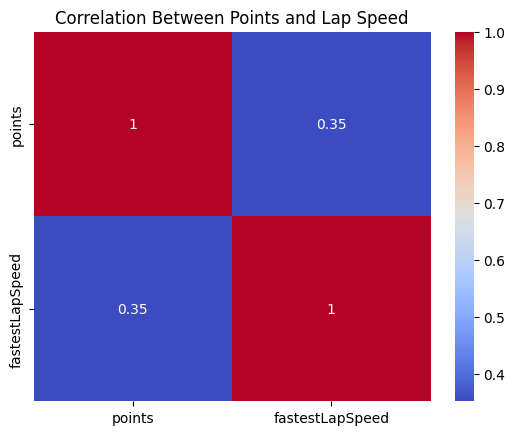

,Name,circuitRef,country,Avg_Lap_Time(s),Avg_Lap_Speed(kph),Avg_Points
0,Adolf Brudes,nurburgring,Germany,NaN,0.000000,0.000000
1,Adolfo Cruz,galvez,Argentina,NaN,0.000000,0.000000
2,Adrian Sutil,albert_park,Australia,92.639429,206.546000,1.142857
3,Adrian Sutil,americas,USA,NaN,0.000000,0.000000
4,Adrian Sutil,bahrain,Bahrain,101.114500,198.333167,0.000000
5,Adrian Sutil,buddh,India,88.854000,207.648500,2.000000
6,Adrian Sutil,catalunya,Spain,87.572800,136.778286,0.857143
7,Adrian Sutil,fuji,Japan,86.540000,190.545000,0.500000
8,Adrian Sutil,hockenheimring,Germany,79.035000,208.550667,0.000000
9,Adrian Sutil,hungaroring,Hungary,86.153500,157.047143,0.000000


In [ ]:
df = df.replace(r'\\N', np.nan, regex=True)

combined = pd.merge(results, drivers, on='driverId', how='left')
combined = pd.merge(combined, races, on='raceId', how='left')
circuits_renamed = circuits.rename(columns={'circuitRef': 'circuitRef_circuit',
                                            'name': 'circuit_name'})
combined = pd.merge(combined, circuits_renamed[['circuitId', 'circuitRef_circuit', 'country', 'location']], on='circuitId', how='left')

print("Merged Columns!")
print("Rows:", combined.shape[0], "| Columns:", combined.shape[1])

# Add 'Name' column
combined['Name'] = combined['forename'] + ' ' + combined['surname']

columns = ['Name', 'nationality', 'year', 'points', 'position',
           'fastestLap', 'fastestLapTime', 'fastestLapSpeed',
           'circuitRef_circuit', 'country', 'location']
combined = combined[columns]

combined.rename(columns={'circuitRef_circuit': 'circuitRef'}, inplace=True)


combined['position'] = pd.to_numeric(combined['position'], errors='coerce')
combined.fillna({'circuitRef': 'Unknown', 'country': 'Unknown', 'location': 'Unknown'}, inplace=True)
combined.to_csv('F1_Master_Data.csv', index=False)
print("F1 Master Dataset")
display(combined.head(30))

def time_to_seconds(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        mins, secs = time_str.split(':')
        return float(mins) * 60 + float(secs)
    else:
        return None

combined['Fastest_Lap_Seconds'] = combined['fastestLapTime'].apply(time_to_seconds)


combined['fastestLapSpeed'] = pd.to_numeric(combined['fastestLapSpeed'], errors='coerce').fillna(0)

corr = combined[['points', 'fastestLapSpeed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Points and Lap Speed')
plt.show()

# Code from cell ab2ad307
driver_circuit = (
    combined.groupby(['Name', 'circuitRef', 'country'])
    .agg({
        'Fastest_Lap_Seconds': 'mean',
        'fastestLapSpeed': 'mean',
        'points': 'mean'
    })
    .reset_index()
)

driver_circuit.rename(columns={
    'Fastest_Lap_Seconds': 'Avg_Lap_Time(s)',
    'fastestLapSpeed': 'Avg_Lap_Speed(kph)',
    'points': 'Avg_Points'
}, inplace=True)

display(driver_circuit.head(10))

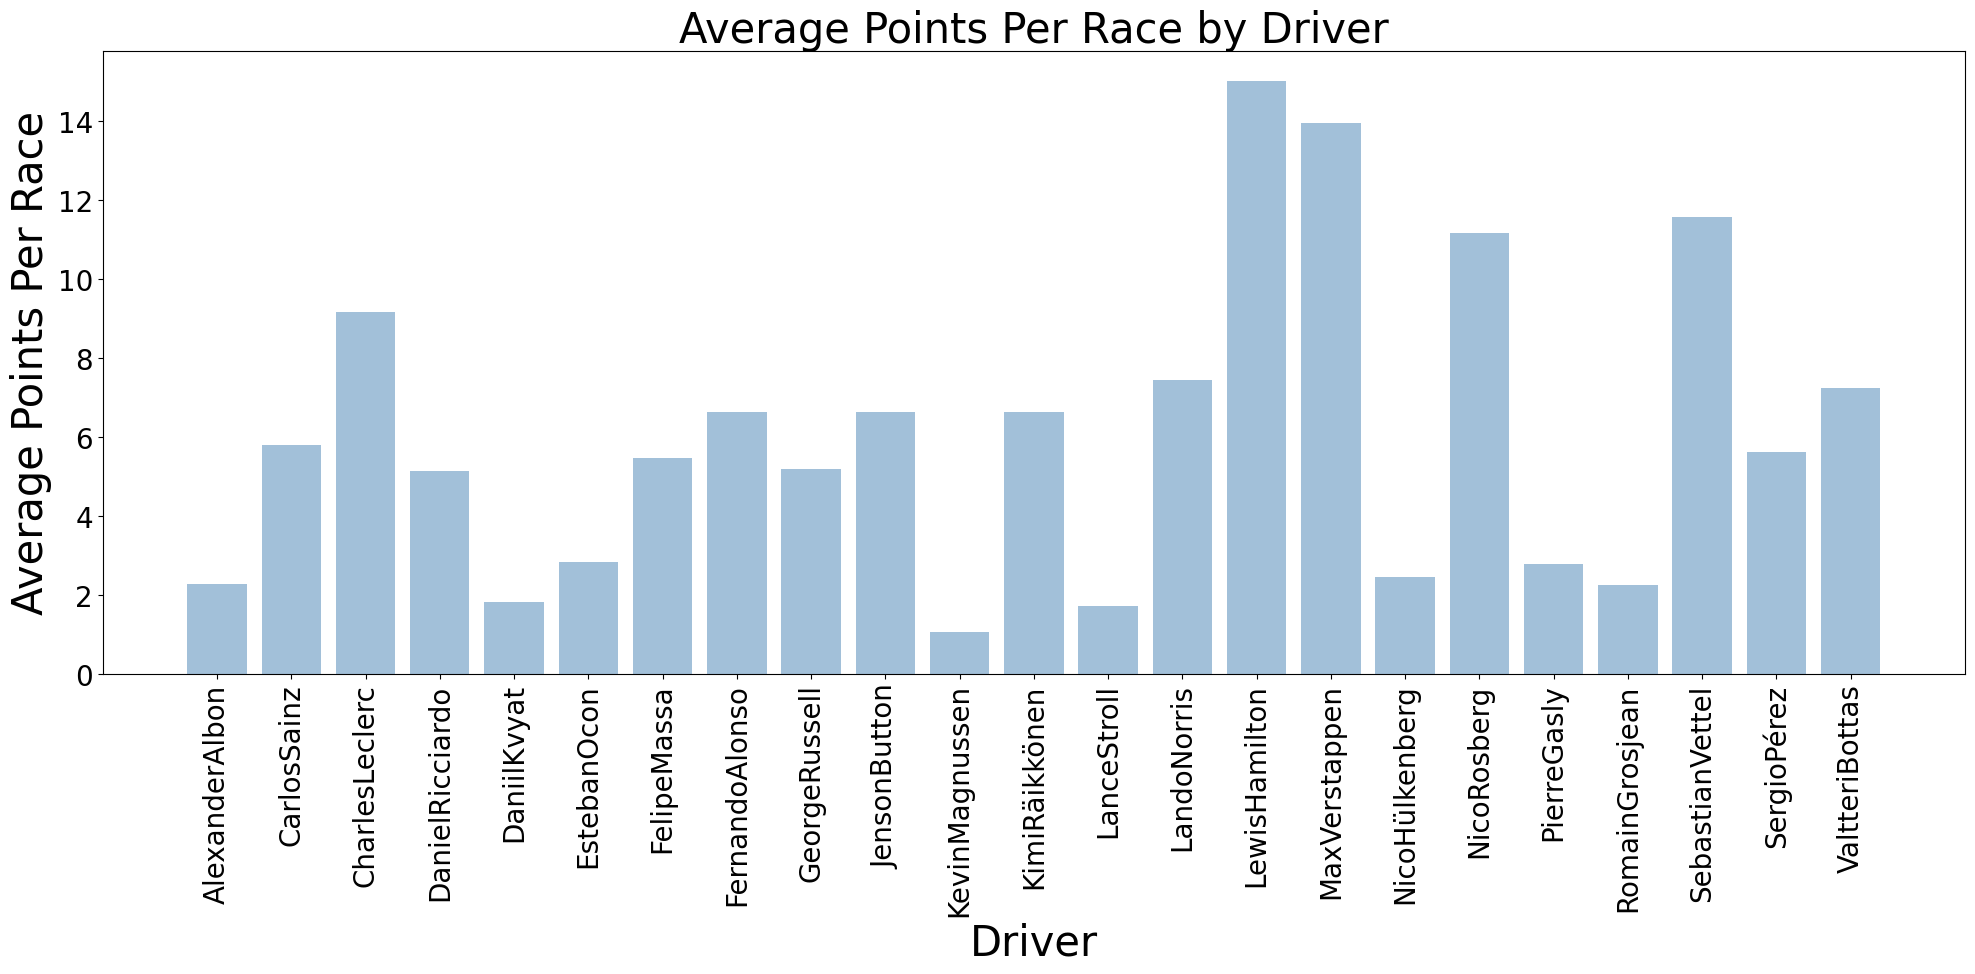

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Code from cell 7iMttK5HTOMK
results2["driver"]= results2["forename"]+""+results2["surname"]

avg_pts = results2[['driver', 'points']].groupby("driver").mean()
total_pts = results2[['driver', 'points']].groupby("driver").sum()
n = results2[['driver', 'raceId']].groupby("driver").count()
num_races = n[n.raceId > 100]

d = pd.merge(avg_pts, total_pts, on = 'driver')
md = pd.merge(d, num_races, on = 'driver')
md = md.reset_index()

md.iloc[7, 3] = 180
md.iloc[6, 3] = 125


plt.rc('font', size=15)
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=30)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('figure', titlesize=30)

plt.figure(figsize=(20, 10))

plt.bar(md.driver, md.points_x, color='steelblue', alpha=0.5)
plt.xlabel("Driver")
plt.ylabel("Average Points Per Race")
plt.title("Average Points Per Race by Driver")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Filtered dataset now has 1730 rows for top drivers.


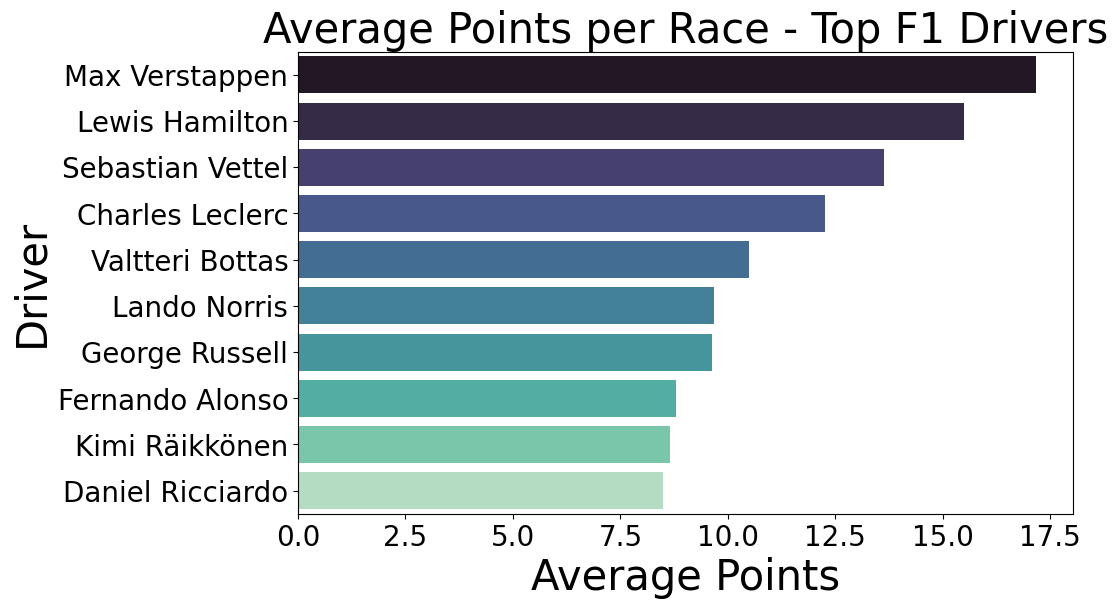

In [ ]:
top_drivers = [
    'Lewis Hamilton', 'Max Verstappen', 'Valtteri Bottas',
    'Sebastian Vettel', 'Fernando Alonso', 'Charles Leclerc',
    'Lando Norris', 'Daniel Ricciardo', 'Kimi Räikkönen',
    'George Russell'
]

df['Driver_Name'] = df['forename'] + df['surname']
top_df = df[df['Driver_Name'].isin(top_drivers)]

print(f"Filtered dataset now has {len(top_df)} rows for top drivers.")
top_df.head()
import seaborn as sns, matplotlib.pyplot as plt

avg_points = top_df.groupby('Driver_Name')['points'].mean().reset_index().sort_values('points', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_points, x='points', y='Driver_Name', palette='mako')
plt.title("Average Points per Race - Top F1 Drivers")
plt.xlabel("Average Points")
plt.ylabel("Driver")
plt.show()


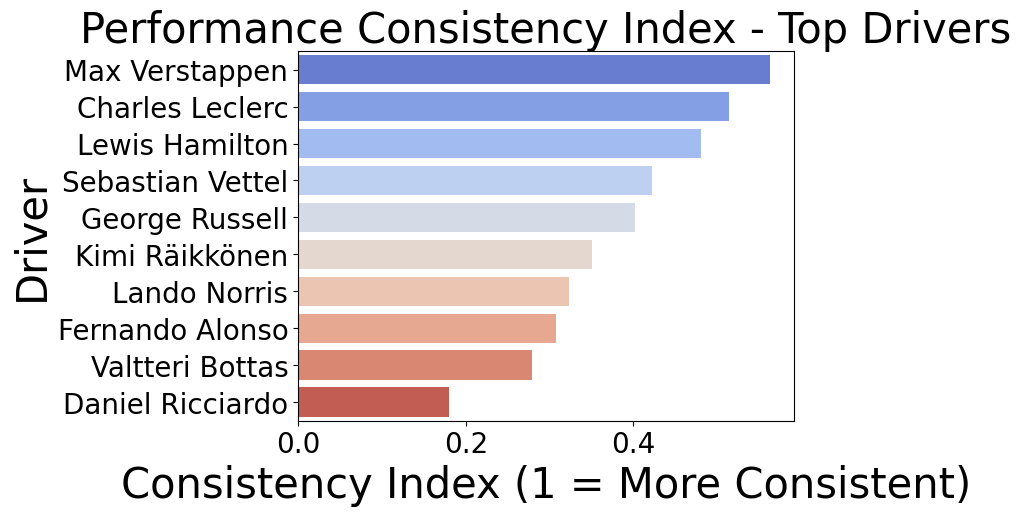

In [ ]:
performance = top_df.groupby('Driver_Name')['points'].agg(['mean','std']).reset_index()
performance['Consistency_Index'] = 1 - (performance['std'] / performance['mean'])
performance = performance.sort_values('Consistency_Index', ascending=False)

sns.barplot(data=performance, x='Consistency_Index', y='Driver_Name', palette='coolwarm')
plt.title("Performance Consistency Index - Top Drivers")
plt.xlabel("Consistency Index (1 = More Consistent)")
plt.ylabel("Driver")
plt.show()


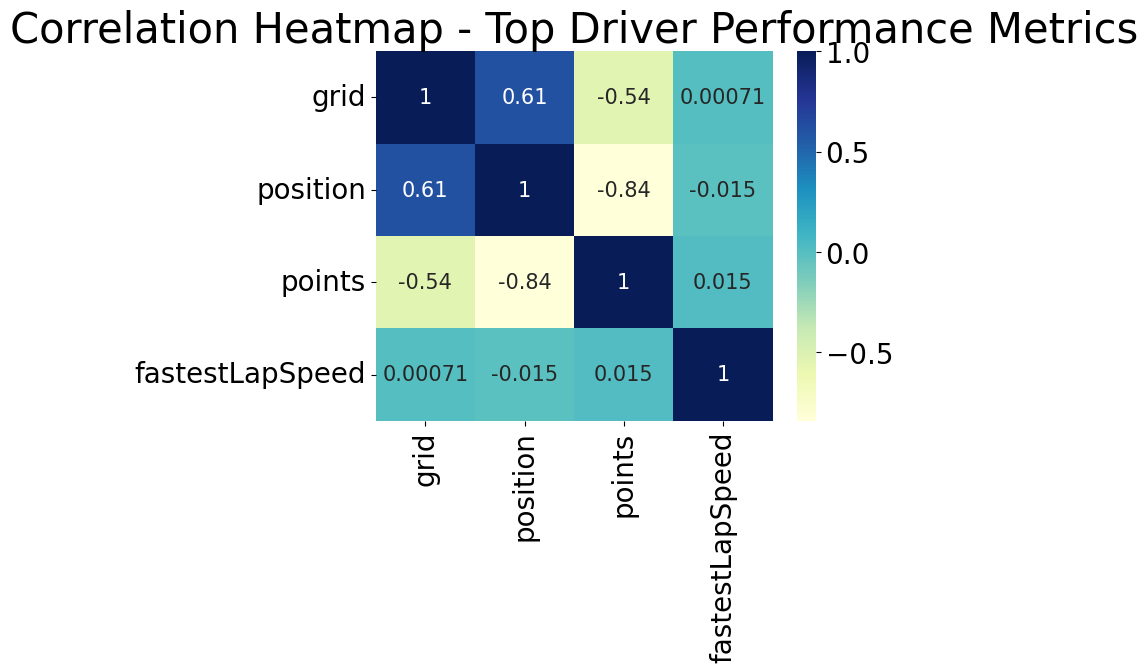

In [ ]:
heatmap_data = top_df[['grid', 'position', 'points', 'fastestLapSpeed']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap - Top Driver Performance Metrics")
plt.show()

In [ ]:
import pandas as pd

drivers= pd.read_csv('/content/drive/MyDrive/F1 Dataset/drivers.csv')
circuits= pd.read_csv('/content/drive/MyDrive/F1 Dataset/circuits.csv')
results= pd.read_csv('/content/drive/MyDrive/F1 Dataset/results.csv')
races= pd.read_csv('/content/drive/MyDrive/F1 Dataset/races.csv')

df= pd.merge(results, drivers, on='driverId', how='left')
df2= pd.merge(df, races, on='raceId', how= 'left')
df3= pd.merge(df2, circuits, on='circuitId', how='left')

df3 = df3[df3['year'] >= 2014]
df3=df3.drop(columns=['sprint_time', 'sprint_date'])
df3=df3.drop(columns=['quali_time', 'quali_date'])
df3=df3.drop(columns=['fp2_time', 'fp2_date'])
df3=df3.drop(columns=['fp3_time', 'fp3_date'])
df3=df3.drop(columns=['fp1_time', 'fp1_date'])
#df3=df3.drop(columns=['fastestLapTime', 'fastestLapSpeed'])
#df=df.drop(columns=['number', 'dob', 'url'])


print(df.columns)
display(df3.head())


drivers['Name'] = drivers['forename'] + ' ' + drivers['surname']
display(drivers)

df.to_csv('Drivers_circuit.csv', index=False)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url'],
      dtype='object')


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,time_y,url_y,circuitRef,name_y,location,country,lat,lng,alt,url
22127,22130,900,3,131,6,3,1,1,1,25.0,...,06:00:00,http://en.wikipedia.org/wiki/2014_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
22128,22131,900,825,1,20,4,2,2,2,18.0,...,06:00:00,http://en.wikipedia.org/wiki/2014_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
22129,22132,900,18,1,22,10,3,3,3,15.0,...,06:00:00,http://en.wikipedia.org/wiki/2014_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
22130,22133,900,4,6,14,5,4,4,4,12.0,...,06:00:00,http://en.wikipedia.org/wiki/2014_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
22131,22134,900,822,3,77,15,5,5,5,10.0,...,06:00:00,http://en.wikipedia.org/wiki/2014_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


,driverId,driverRef,number,code,forename,surname,dob,nationality,url,Name
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant,Logan Sargeant
857,859,lawson,30,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson,Liam Lawson
858,860,bearman,38,BEA,Oliver,Bearman,2005-05-08,British,http://en.wikipedia.org/wiki/Oliver_Bearman,Oliver Bearman
859,861,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto,Franco Colapinto


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/F1 Dataset/results_with_driver_info.csv")
df.head()

circuit_performance = df.groupby(['forename', 'surname',''])['points'].mean().reset_index()
best_per_circuit = circuit_performance.loc[circuit_performance.groupby('circuitRef')['points'].idxmax()]

plt.figure(figsize=(12,6))
sns.barplot(data=best_per_circuit, x='circuitRef', y='points', hue='Driver_Name')
plt.xticks(rotation=45)
plt.title('Top Performing Drivers by Circuit')
plt.xlabel('Circuit')
plt.ylabel('Average Points')
plt.legend(title='Driver')
plt.show()


KeyError: 'circuitRef'

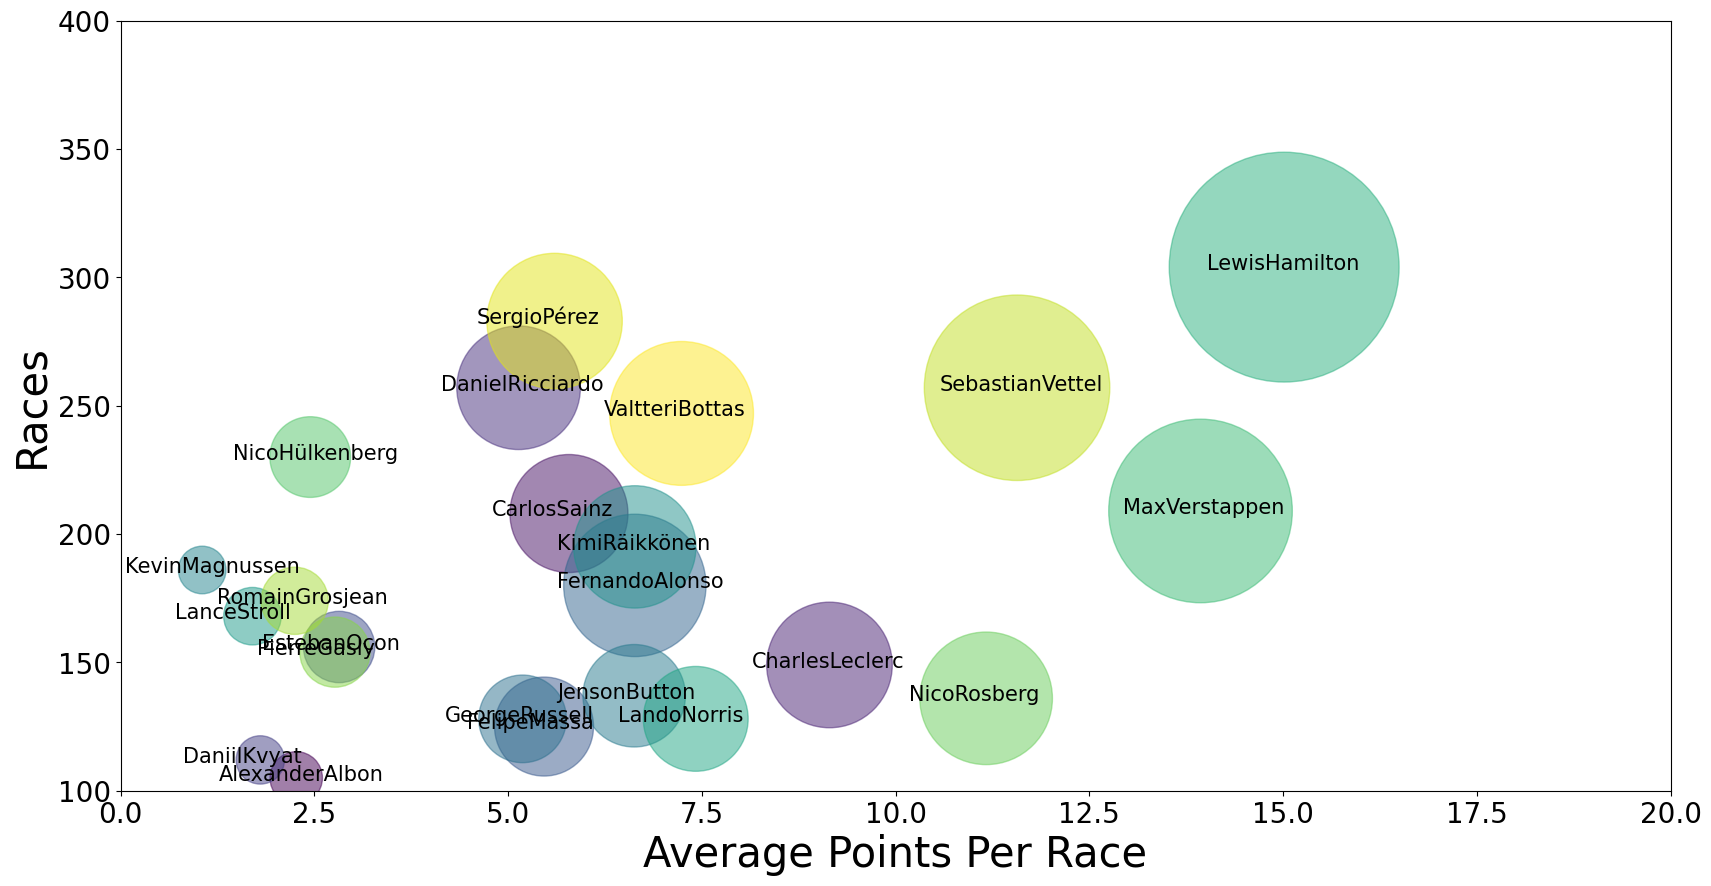

In [ ]:
results2["driver"]= results2["forename"]+""+results2["surname"]

avg_pts = results2[['driver', 'points']].groupby("driver").mean()
total_pts = results2[['driver', 'points']].groupby("driver").sum()
n = results2[['driver', 'raceId']].groupby("driver").count()
num_races = n[n.raceId > 100]

d = pd.merge(avg_pts, total_pts, on = 'driver')
md = pd.merge(d, num_races, on = 'driver')
md = md.reset_index()

md.iloc[7, 3] = 180
md.iloc[6, 3] = 125

plt.rc('font', size = 15)          # controls default text sizes
plt.rc('axes', titlesize = 30)     # fontsize of the axes title
plt.rc('axes', labelsize = 30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = 20)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 20)    # fontsize of the tick labels
plt.rc('legend', fontsize = 30)    # legend fontsize
plt.rc('figure', titlesize = 30)   # fontsize of the figure title

plt.figure(figsize = (20, 10))
plt.scatter(md.points_x, md.raceId, s = md.points_y * 6, alpha = 0.5, c = md.index.to_series())
plt.xlim(0, 20)
plt.ylim(100, 400)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x, y, z in zip(md.points_x, md.raceId, md.driver):
   plt.annotate(z, xy = (x - 1, y - 1))

ValueError: Could not interpret value `circuitRef` for `x`. An entry with this name does not appear in `data`.

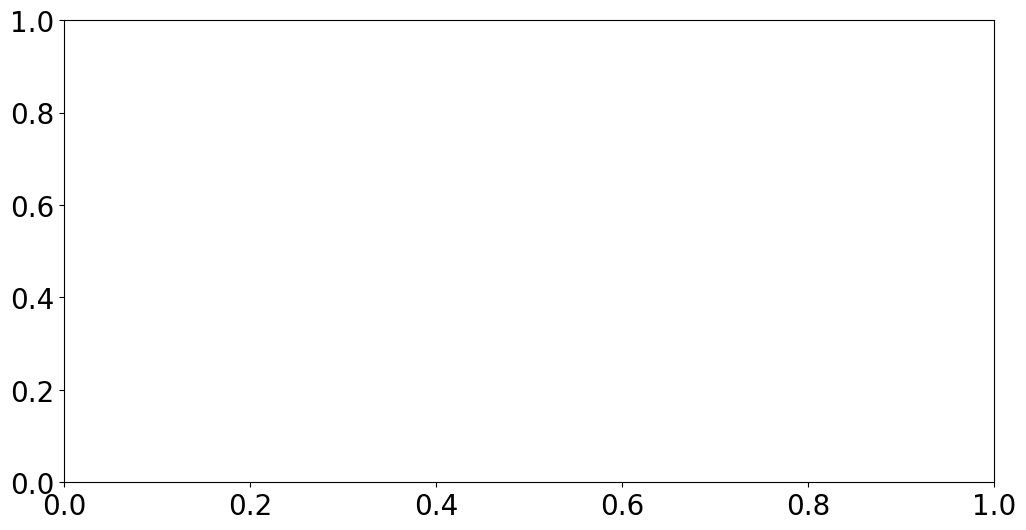

In [ ]:
# 1️ Merge all datasets
combined = (
    results
    .merge(drivers, on='driverId', how='left', suffixes=('_result', '_driver'))
    .merge(races, on='raceId', how='left', suffixes=('_driver', '_race'))
    .merge(circuits, on='circuitId', how='left', suffixes=('_race', '_circuit')) # Added suffixes
)
print(combined.columns)


# 2️ Filter only data from 2014 onwards
combined = combined[combined['year'] >= 2014]

# Convert 'fastestLapSpeed' to numeric, coercing errors, and fill NaN
combined['fastestLapSpeed'] = pd.to_numeric(combined['fastestLapSpeed'], errors='coerce').fillna(0)


combined = combined[['surname', 'nationality', 'year', 'points',
                     'fastestLap', 'fastestLapTime', 'fastestLapSpeed',
                     'circuitRef', 'country']]



combined.rename(columns={'surname': 'Driver_Name'}, inplace=True)


#  Group by circuit and driver
driver_circuit = (combined.groupby(['circuitRef', 'country', 'Driver_Name']) # Updated column name for grouping
    .agg(Avg_Points=('points', 'mean'),
         Avg_Speed=('fastestLapSpeed', 'mean'))
    .reset_index()
)

#  Top driver per circuit
driver_circuit = driver_circuit.loc[
    driver_circuit.groupby('circuitRef')['Avg_Points'].idxmax()
].reset_index(drop=True)

print(driver_circuit.head(25))
df.to_csv('Drivers.csv', index=False)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Avg_Speed', y='Avg_Points', hue='Driver_Name', style='country', s=150, data=driver_circuit)
plt.title('Average Speed vs Points by Driver')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.barplot(x='circuitRef', y='Avg_Points', hue='Driver_Name', data=df)
plt.xticks(rotation=45)
plt.title('Average Points per Circuit by Driver')
plt.ylabel('Average Points')
plt.xlabel('Circuit')
plt.show()


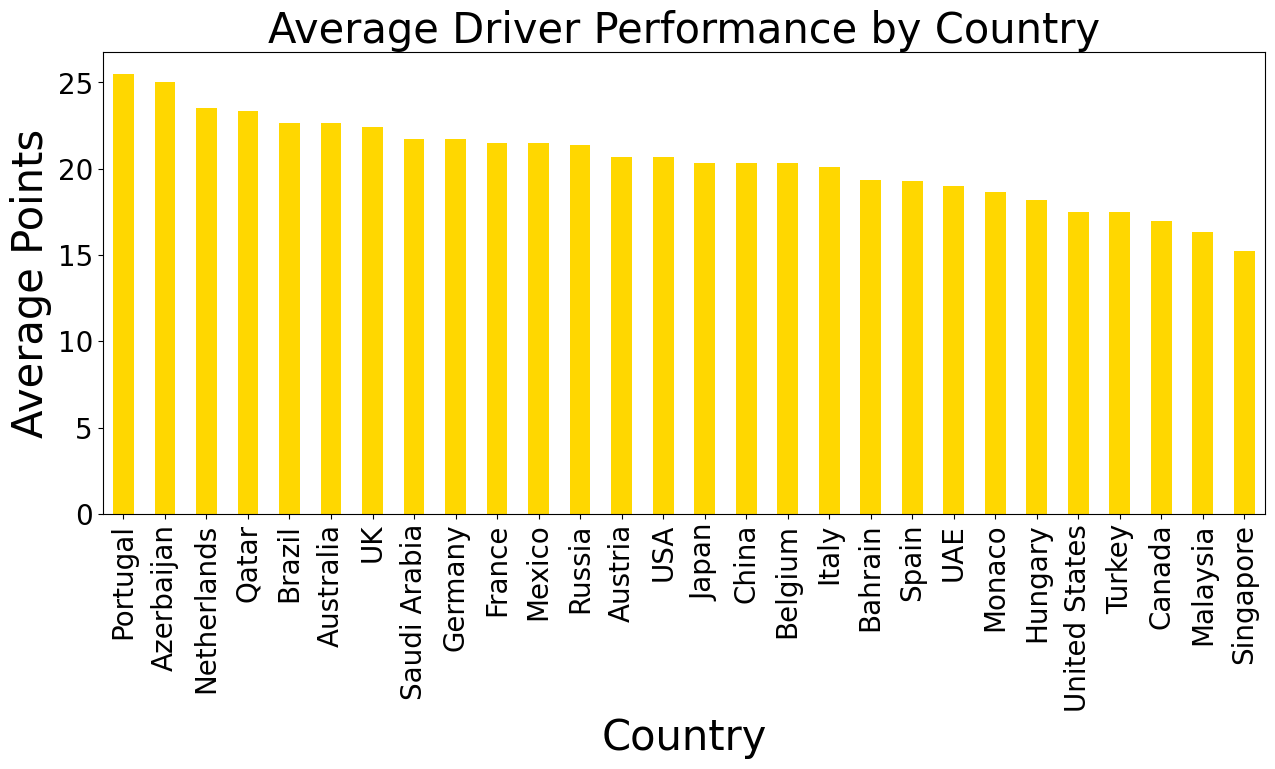

In [ ]:
country_performance = (
    driver_circuit.groupby('country')['Avg_Points']
    .mean().sort_values(ascending=False)
)

country_performance.plot(kind='bar', figsize=(15,6), color='gold')
plt.title('Average Driver Performance by Country')
plt.xlabel('Country')
plt.ylabel('Average Points')
plt.show()


In [ ]:
top_drivers = (
    driver_circuit.groupby('Driver_Name')
    .agg(Total_Avg_Points=('Avg_Points', 'mean'),
         Total_Avg_Speed=('Avg_Speed', 'mean'))
    .sort_values(by='Total_Avg_Points', ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='Driver_Name',
    y='Total_Avg_Points',
    data=top_drivers,
    palette='coolwarm'
)
plt.title('Top 10 Drivers by Average Points', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Average Points per Circuit')
plt.tight_layout()
plt.show()

import seaborn as sns
plt.figure(figsize=(14, 8))
sns.lineplot(data=combined, x='year', y='points', hue='Name', estimator='mean')
plt.title("Driver Performance Over the Years (Avg Points)")
plt.xlabel("Year")
plt.ylabel("Average Points")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



NameError: name 'driver_circuit' is not defined

In [ ]:
corr = combined[['points', 'fastestLapSpeed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Points and Lap Speed')
plt.show()


NameError: name 'combined' is not defined

In [ ]:
def time_to_seconds(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        mins, secs = time_str.split(':')
        return float(mins) * 60 + float(secs)
    else:
        return None

combined['Fastest_Lap_Seconds'] = combined['fastestLapTime'].apply(time_to_seconds)

driver_circuit = (
    combined.groupby(['Name', 'circuitRef', 'country'])
    .agg({
        'Fastest_Lap_Seconds': 'mean',
        'fastestLapSpeed': 'mean',
        'points': 'mean'
    })
    .reset_index()
)

driver_circuit.rename(columns={
    'Fastest_Lap_Seconds': 'Avg_Lap_Time(s)',
    'fastestLapSpeed': 'Avg_Lap_Speed(kph)',
    'points': 'Avg_Points'
}, inplace=True)

display(driver_circuit.head())

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
top_driver_each_circuit = (
    driver_circuit.loc[
        driver_circuit.groupby('circuitRef')['Avg_Points'].idxmax()
    ][['circuitRef', 'country', 'Name', 'Avg_Points', 'Avg_Lap_Speed(kph)']]
)

print(top_driver_each_circuit.head(10))

driver_circuit['Avg_Lap_Speed(kph)'] = driver_circuit['Avg_Lap_Speed(kph)'].replace(0, np.nan)
import numpy as np
driver_circuit['Avg_Lap_Speed(kph)'].replace(0, np.nan, inplace=True)


top_speed = driver_circuit.nlargest(10, 'Avg_Lap_Speed(kph)')
plt.figure(figsize=(10,6))
plt.barh(top_speed['circuitRef'], top_speed['Avg_Lap_Speed(kph)'], color='crimson')
plt.xlabel('Average Lap Speed (kph)')
plt.title('Top 10 Fastest Circuits in F1')
plt.gca().invert_yaxis()
plt.show()
combined['circuitRef'].nunique(), combined['circuitRef'].unique()[:20]

driver_circuit = (
    combined.groupby(['circuitRef', 'country', 'Name'])
    .agg(
        Avg_Points=('points', 'mean'),
        Avg_Lap_Speed_kph=('fastestLapSpeed', 'mean')
    )
    .reset_index()
)

combined.isnull().sum().sort_values(by='points', ascending=False).head(20)
combined['fastestLapSpeed'] = combined['fastestLapSpeed'].fillna(combined['fastestLapSpeed'].mean())
combined['points'] = combined['points'].fillna(0)


NameError: name 'driver_circuit' is not defined